### 1. Problem



* A company requires different numbers of employees on different weekdays
* In general, Each employee is required to work up to 5 days a week
* Each employee provides preference rating (from 0 to 10) of how much they want to work on that day
* Formulate LP to maximize the total work preference rating
* All data above can be find in the file ***'Employee_Schedule.xlsx'***


In [222]:
import pandas as pd
df = pd.read_excel('Employee_Schedule.xlsx', index_col=0)
df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Employee_Required,3,4,4,5,4,3,2
Katie,5,6,0,1,10,2,0
Ellie,2,8,0,4,1,2,3
Keith,8,4,5,6,1,2,2
Tylor,2,8,2,4,3,0,2
Mitchel,2,2,9,9,8,1,1


### 2. Coding 

In [223]:
import pandas as pd
import numpy as ny
import gurobipy as gp
from gurobipy import Model, quicksum, GRB
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [224]:
weekdays = df.columns.tolist()
employees = df.index.values.tolist()[1:]
print(weekdays)
print(employees)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
['Katie', 'Ellie', 'Keith', 'Tylor', 'Mitchel']


In [225]:
# create a new model
model = Model()

# set decision variables
X = model.addVars(employees, weekdays, vtype=GRB.BINARY, name='X')

# set the bojective function
model.setObjective(quicksum(df.loc[e, d]*X[e, d] for e in employees for d in weekdays), GRB.MAXIMIZE)

# Add constraints
for e in employees:
    model.addConstr(
        quicksum(X[e, d] for d in weekdays) <= 5
        , name='Work_up_to_5_days'
    )
for d in weekdays:
    model.addConstr(
        quicksum(X[e, d] for e in employees) == df.loc['Employee_Required', d]
        , name='Required_days'
    )
# Set parameters for solution pool
model.Params.PoolSearchMode = 2     # Search for multiple solutions
model.Params.PoolSolutions = 5      # Return up to 5 solutions

# Optimize the model
model.optimize()

Set parameter PoolSearchMode to value 2
Set parameter PoolSolutions to value 5
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 19.6.0 19H2026)

CPU model: Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 12 rows, 35 columns and 70 nonzeros
Model fingerprint: 0x076d3bbd
Variable types: 0 continuous, 35 integer (35 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 5e+00]
Found heuristic solution: objective 101.0000000
Presolve removed 1 rows and 5 columns
Presolve time: 0.00s
Presolved: 11 rows, 30 columns, 60 nonzeros
Variable types: 0 continuous, 30 integer (30 binary)
Found heuristic solution: objective 108.0000000

Root relaxation: objective 1.130000e+02, 13 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |

In [226]:
print(f"ObjVal = {model.ObjVal:.2f}")
# Number of solutions found
print(f"Number of solutions found: {model.SolCount}")
model.Params.SolutionNumber = 1 
# 1 means the first solution out of 5 optimal solutions
print('For here we only print optimal solution 1')
model.printAttr('X')

ObjVal = 113.00
Number of solutions found: 5
For here we only print optimal solution 1

    Variable            X 
-------------------------
X[Katie,Monday]            1 
X[Katie,Tuesday]            1 
X[Katie,Wednesday]            1 
X[Katie,Thursday]            1 
X[Katie,Friday]            1 
X[Ellie,Tuesday]            1 
X[Ellie,Thursday]            1 
X[Ellie,Friday]            1 
X[Ellie,Saturday]            1 
X[Ellie,Sunday]            1 
X[Keith,Monday]            1 
X[Keith,Tuesday]            1 
X[Keith,Wednesday]            1 
X[Keith,Thursday]            1 
X[Keith,Saturday]            1 
X[Tylor,Tuesday]            1 
X[Tylor,Wednesday]            1 
X[Tylor,Thursday]            1 
X[Tylor,Friday]            1 
X[Tylor,Sunday]            1 
X[Mitchel,Monday]            1 
X[Mitchel,Wednesday]            1 
X[Mitchel,Thursday]            1 
X[Mitchel,Friday]            1 
X[Mitchel,Saturday]            1 


In [227]:
model.Params.SolutionNumber = 1 
print(f"Number of solutions found: {model.SolCount}")
print('For here we only print optimal solution 1')
if model.status == GRB.OPTIMAL:
    print("\n✅ Optimal solution found:\n")
    print(f'Objective value: {model.ObjVal}\n')
    
    #Print all variables and their optimal values
    for var in model.getVars():
        print(f"{var.VarName}: {var.X:.0f}")
else:
    Print('❌ No optimal solution found.')

Number of solutions found: 5
For here we only print optimal solution 1

✅ Optimal solution found:

Objective value: 113.0

X[Katie,Monday]: 1
X[Katie,Tuesday]: 1
X[Katie,Wednesday]: 1
X[Katie,Thursday]: 1
X[Katie,Friday]: 1
X[Katie,Saturday]: 0
X[Katie,Sunday]: -0
X[Ellie,Monday]: -0
X[Ellie,Tuesday]: 1
X[Ellie,Wednesday]: 0
X[Ellie,Thursday]: 1
X[Ellie,Friday]: 1
X[Ellie,Saturday]: 1
X[Ellie,Sunday]: 1
X[Keith,Monday]: 1
X[Keith,Tuesday]: 1
X[Keith,Wednesday]: 1
X[Keith,Thursday]: 1
X[Keith,Friday]: -0
X[Keith,Saturday]: 1
X[Keith,Sunday]: 0
X[Tylor,Monday]: -0
X[Tylor,Tuesday]: 1
X[Tylor,Wednesday]: 1
X[Tylor,Thursday]: 1
X[Tylor,Friday]: 1
X[Tylor,Saturday]: -0
X[Tylor,Sunday]: 1
X[Mitchel,Monday]: 1
X[Mitchel,Tuesday]: 0
X[Mitchel,Wednesday]: 1
X[Mitchel,Thursday]: 1
X[Mitchel,Friday]: 1
X[Mitchel,Saturday]: 1
X[Mitchel,Sunday]: -0


In [228]:
df_schedule = df.copy()
df_schedule

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Employee_Required,3,4,4,5,4,3,2
Katie,5,6,0,1,10,2,0
Ellie,2,8,0,4,1,2,3
Keith,8,4,5,6,1,2,2
Tylor,2,8,2,4,3,0,2
Mitchel,2,2,9,9,8,1,1



Solution 1


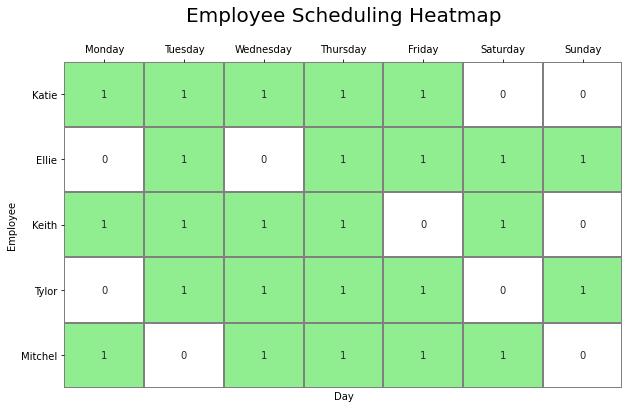


Solution 2


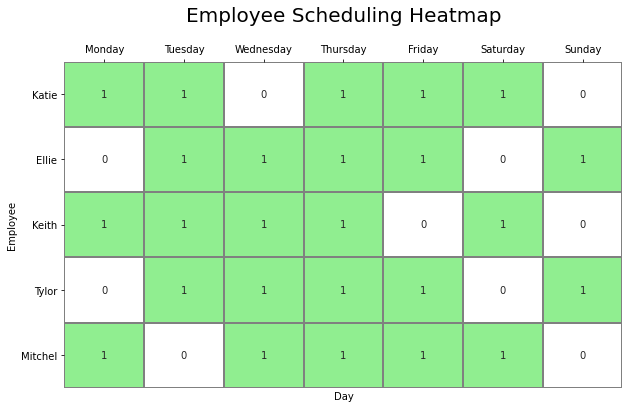


Solution 3


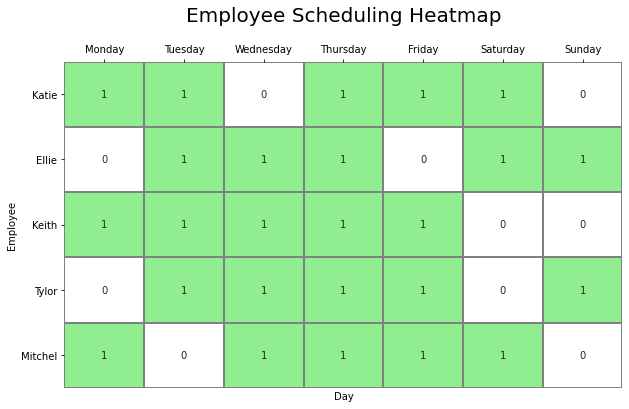


Solution 4


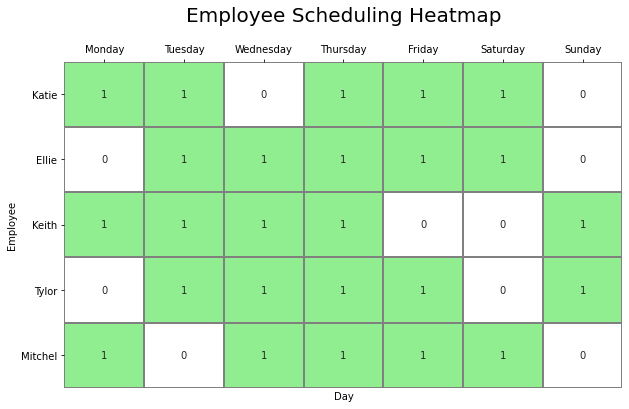


Solution 5


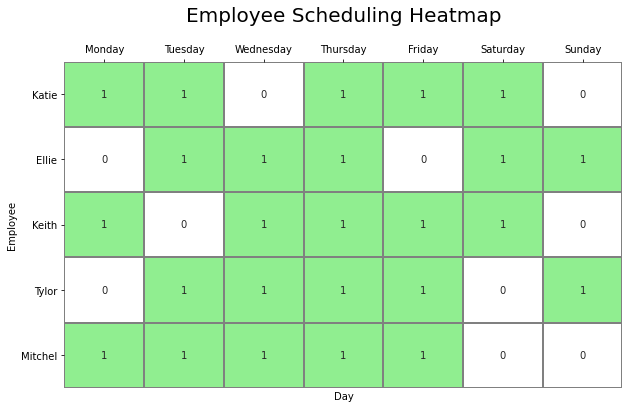

In [229]:
df_schedule_list = []

for k in range(model.SolCount):
    model.Params.SolutionNumber = k
    print(f"\nSolution {k + 1}")
    df_schedule = df.copy()
    for e in employees:
        for d in weekdays:
            df_schedule.loc[e, d] = X[e, d].Xn
    df_schedule['Total'] = df_schedule.iloc[1:, :].sum(axis=1)
    df_schedule.loc['Total'] = df_schedule.iloc[1:, :-1].sum(axis=0)

    df_schedule_list.append(df_schedule)
    
    data = df_schedule.iloc[1:-1, :-1]

    # Custom colormap: white = off (0), light green = on shift (1)
    cmap = ListedColormap(['white', 'lightgreen'])

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(data, annot=True, cmap=cmap, cbar=False, linewidths=1, linecolor='grey')

    ax.xaxis.tick_top()
    plt.yticks(rotation=0)
    plt.title("Employee Scheduling Heatmap", fontsize=20, pad=40)
    plt.xlabel("Day")
    plt.ylabel("Employee")

    plt.show()

In [232]:
import os
path = os.path.abspath('Employee Scheduling (multiple optimal solutions with visualization).ipynb')

In [233]:
path

'/Users/hayley/Desktop/Linear Programming/Employee Scheduling (multiple optimal solutions with visualization).ipynb'